In [3]:
import pandas as pd
import os

# Load the cleaned dataset
file_path = r"D:\club-mate\data\processed\club_mate_clean.csv"
df = pd.read_csv(file_path)

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")

print("Data Loaded:", df.shape)
print(df.head(2))


Data Loaded: (3456, 20)
  Transaction_ID       Date         Region    City    Product      Channel  \
0         T00001 2023-01-01  Lower Bavaria  Munich  Club-Mate       Retail   
1         T00002 2023-01-01  Lower Bavaria  Munich  Club-Mate  Supermarket   

   Units_Sold  Unit_Price  Revenue  Total_Cost  Profit  Cost_per_Unit_costing  \
0        2753        1.23  3373.47     2890.65  482.82                    0.9   
1        3190        1.29  4102.32     3349.50  752.82                    0.9   

   Packaging_Cost  Distribution_Cost  Marketing_Spend Warehouse_ID  \
0             0.1               0.05             0.02       WH-010   
1             0.1               0.05             0.02       WH-010   

   Opening_Stock  Units_Produced  Units_Sold_inventory  Closing_Stock  
0        17940.0         22936.0                9700.0        31176.0  
1        17940.0         22936.0                9700.0        31176.0  


In [4]:
pip install prophet


In [5]:
pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cython-3.1.4-cp313-cp313-win_amd64.whl.metadata (5.1 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12.tar.gz (5.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached ephem-4.2-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using 

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
      exec(compile('''
      ~~~~^^^^^^^^^^^^
      # This is <pip-setuptools-caller> -- a caller that pip uses to run setup.py
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
      ...<32 lines>...
      exec(compile(setup_py_code, filename, "exec"))
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
      ''' % ('C:\\Users\\rawat\\AppData\\Local\\Temp\\pip-install-066bf0u_\\pystan_4ab382dd94f2460d8bbff5e2e70f7aa5\\setup.py',), "<pip-setuptools-caller>", "exec"))
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "<pip-setuptools-caller>", line 35, in <module>
    File "C:\Users\rawat\AppData\Local\Temp\pip-install-066

In [7]:
import os

# Define folder for saving visuals
save_folder = r"D:\club-mate\reports\visuals"
os.makedirs(save_folder, exist_ok=True)


19:48:19 - cmdstanpy - INFO - Chain [1] start processing
19:48:24 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rawat\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


NameError: name 'save_folder' is not defined

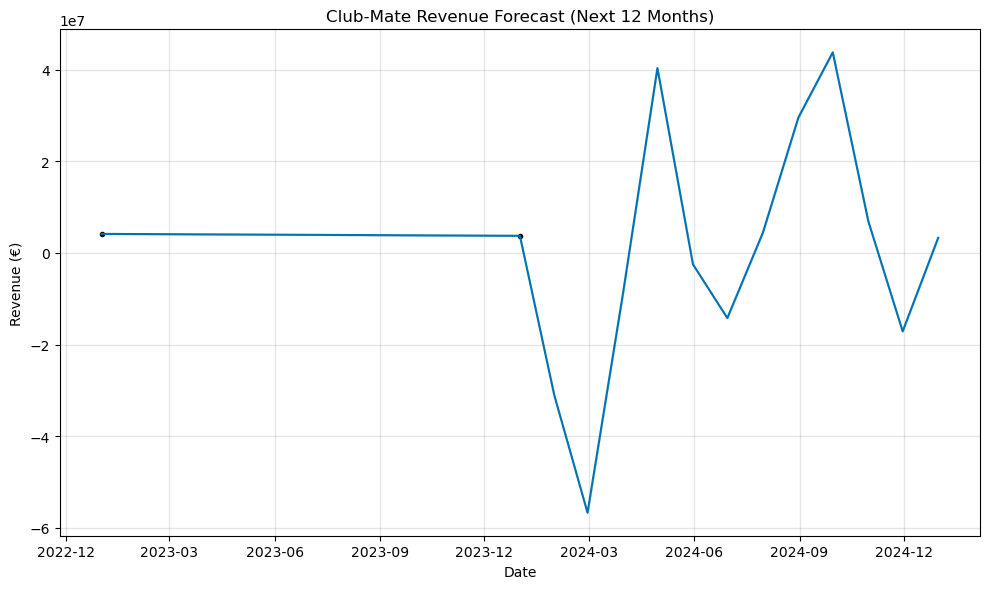

In [6]:
from prophet import Prophet
import matplotlib.pyplot as plt

# --- Prepare monthly revenue per product ---
brand_monthly = (
    df.groupby([df["Date"].dt.to_period("M"), "Product"])["Revenue"]
    .sum()
    .reset_index()
)
brand_monthly["Date"] = brand_monthly["Date"].astype(str)
brand_monthly["Date"] = pd.to_datetime(brand_monthly["Date"])

# --- Forecast function ---
def forecast_brand(brand, periods=12):
    brand_df = brand_monthly[brand_monthly["Product"] == brand][["Date", "Revenue"]]
    brand_df = brand_df.rename(columns={"Date": "ds", "Revenue": "y"})

    # Initialize and fit model
    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(brand_df)

    # Future dataframe for prediction
    future = model.make_future_dataframe(periods=periods, freq="M")
    forecast = model.predict(future)

    # Plot
    fig = model.plot(forecast)
    plt.title(f"{brand} Revenue Forecast (Next {periods} Months)")
    plt.xlabel("Date")
    plt.ylabel("Revenue (€)")
    plt.tight_layout()

    # Save chart
    save_path = os.path.join(save_folder, f"{brand.lower()}_forecast.png")
    plt.savefig(save_path)
    plt.show()

    return forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(periods)

# --- Run for each brand ---
clubmate_forecast = forecast_brand("Club-Mate", periods=12)
coke_forecast = forecast_brand("Coca-Cola", periods=12)
pepsi_forecast = forecast_brand("Pepsi", periods=12)


19:49:47 - cmdstanpy - INFO - Chain [1] start processing
19:49:48 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rawat\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


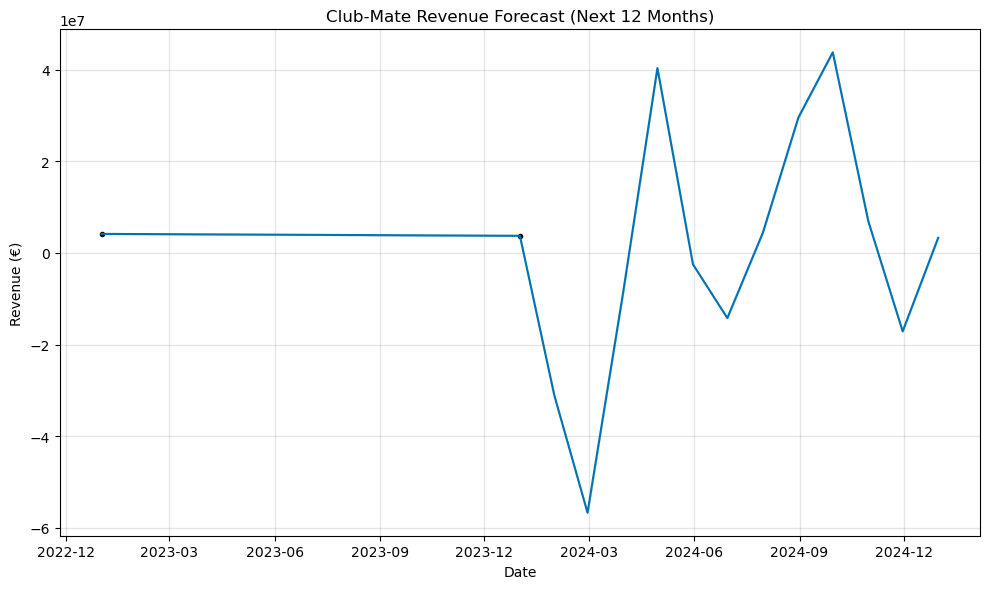

19:49:49 - cmdstanpy - INFO - Chain [1] start processing
19:49:49 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rawat\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


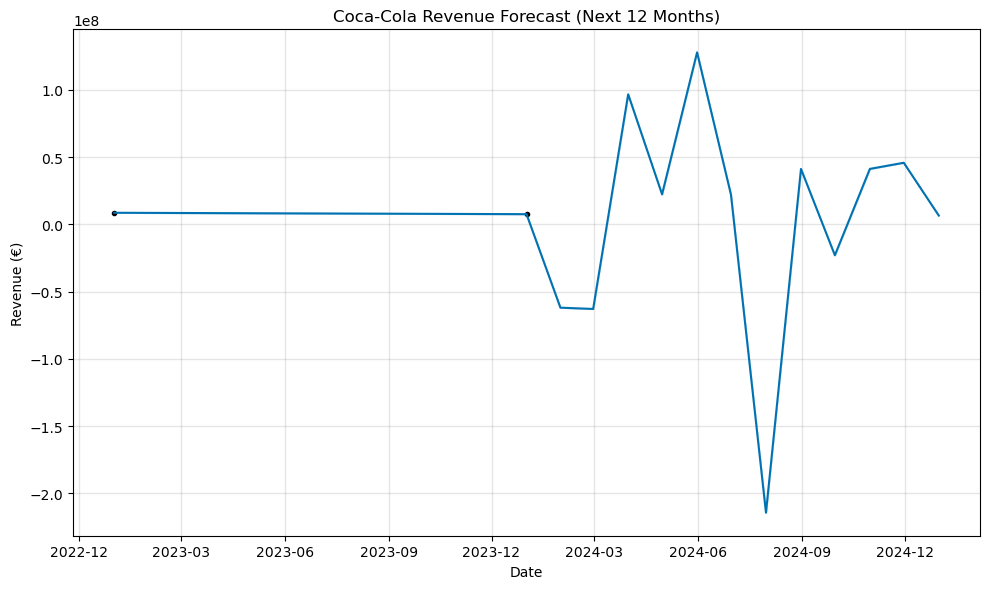

19:49:50 - cmdstanpy - INFO - Chain [1] start processing
19:49:51 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rawat\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


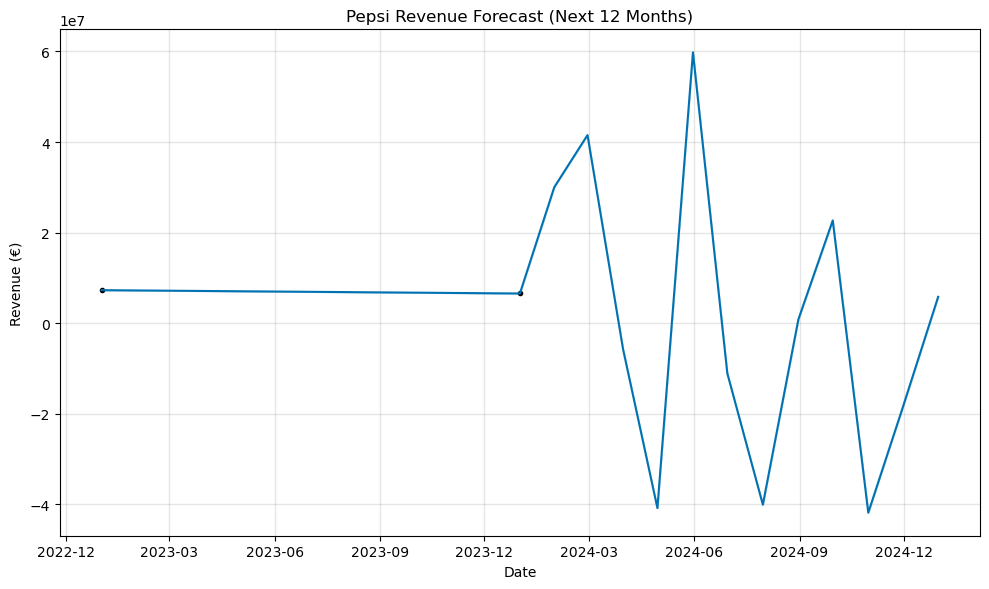

In [8]:
clubmate_forecast = forecast_brand("Club-Mate", periods=12)
coke_forecast = forecast_brand("Coca-Cola", periods=12)
pepsi_forecast = forecast_brand("Pepsi", periods=12)
